<a href="https://colab.research.google.com/github/heber-augusto/datascience-colab-templates/blob/master/examples_grouping_and_plotting_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [2]:
import pandas as pd
import requests
import base64
import json
from getpass import getpass
from datetime import datetime, timedelta
import matplotlib.pylab as plt

**Google Colab access to sample files**

In [3]:
df = pd.read_csv('./sample_data/california_housing_train.csv')
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Preparing variables to call REST API endpoints**

In [4]:
# get user and password without showing them
base  = "https://api.telemetria.hitecnologia.com.br/rest/v1/"
user = getpass('Enter the user name: ')
pwd  = getpass('Enter the secret value: ')

Enter the user name: ··········
Enter the secret value: ··········


# Creating dataframe from REST API
**Calling endpoint to receive access token**

In [5]:
# encode password into base64
p=base64.b64encode(pwd.encode())
pwd=p.decode()
url='{}/auth/login/'.format(base)
headers={
    "Content-Type": "application/json", 
    "Accept": "application/json"
}
data={
    "email":"{}".format(user),
    "password":"{}".format(pwd)
}

# request token
response = requests.post(
    url=url,
    data=json.dumps(data), 
    headers=headers
)
result = json.loads(response.text)

**Use access token to receive historical data from REST API**

In [6]:
access_token = result["token"]

# get start and end datetime with ISO8601 format considering the last 24 hours
now_dt   = datetime.now()
end      = now_dt.isoformat()
start    = (now_dt - timedelta(days=30)).isoformat()

# format url to call rest api
data_ids = '128,129'
history_url = f'{base}data_history/?format=json&data_ids={data_ids}&start={start}&end={end}'

header={
    "Content-Type": "application/json", 
    "Accept": "application/json",
    "Authorization":"Bearer {0}".format(access_token),
}

# get temperature and humidity sensor values from last 30 days
response = requests.get(history_url, headers=header)
df = pd.read_json(response.text)
df


,data_id,date_time,value
0,129,2020-09-10 18:34:24+00:00,41.73378
1,128,2020-09-10 18:34:24+00:00,23.80948
2,129,2020-09-10 18:29:19+00:00,41.92914
3,128,2020-09-10 18:29:19+00:00,23.56528
4,129,2020-09-10 18:24:12+00:00,42.00240
...,...,...,...
16853,128,2020-08-11 18:50:55+00:00,23.29666
16854,128,2020-08-11 18:45:49+00:00,23.29666
16855,129,2020-08-11 18:45:49+00:00,41.80704
16856,128,2020-08-11 18:40:43+00:00,22.24660


# Grouping, resample and aggregation examples

In [10]:
grouped = df.groupby('data_id')
df1 = grouped.get_group(128)
df1 = df1.rename(columns={"value": "temperatura"})
df1.index = df1['date_time']
df1 = df1[['temperatura']]

df2 = grouped.get_group(129)
df2 = df2.rename(columns={"value": "umidade"})
df2.index = df2['date_time']
df2 = df2[['umidade']]

In [11]:
pd.concat([df1, df2], axis = 1).resample('1D').mean()

,temperatura,umidade
date_time,,
2020-08-11 00:00:00+00:00,22.593519,45.869675
2020-08-12 00:00:00+00:00,22.468631,44.579316
2020-08-13 00:00:00+00:00,22.456768,47.185155
2020-08-14 00:00:00+00:00,22.585796,50.274632
2020-08-15 00:00:00+00:00,22.533232,50.222068
2020-08-16 00:00:00+00:00,22.802371,56.863529
2020-08-17 00:00:00+00:00,22.871042,61.324335
2020-08-18 00:00:00+00:00,22.554101,60.232623
2020-08-19 00:00:00+00:00,22.756227,59.090878


**Example of how to create daily media columns and create a new dataframe concatenating the result of each value**

In [12]:
df1_1H = df1.resample('1D').mean()
df2_1H = df2.resample('1D').mean()
pd.concat([df1_1H, df2_1H], axis = 1)

,temperatura,umidade
date_time,,
2020-08-11 00:00:00+00:00,22.593519,45.869675
2020-08-12 00:00:00+00:00,22.468631,44.579316
2020-08-13 00:00:00+00:00,22.456768,47.185155
2020-08-14 00:00:00+00:00,22.585796,50.274632
2020-08-15 00:00:00+00:00,22.533232,50.222068
2020-08-16 00:00:00+00:00,22.802371,56.863529
2020-08-17 00:00:00+00:00,22.871042,61.324335
2020-08-18 00:00:00+00:00,22.554101,60.232623
2020-08-19 00:00:00+00:00,22.756227,59.090878


**Example of how to create mean / max / min columns for each signal and create a new concatenating dataframe**

In [13]:
df1_resampled = df1.resample('1D')
concat_list = []
concat_list.append(df1_resampled.mean().rename(columns={"temperatura": "mean_t"}))
concat_list.append(df1_resampled.max().rename(columns={"temperatura": "max_t"}))
concat_list.append(df1_resampled.min().rename(columns={"temperatura": "min_t"}))


df2_resampled = df2.resample('1D')
concat_list.append(df2_resampled.mean().rename(columns={"umidade": "mean_u"}))
concat_list.append(df2_resampled.max().rename(columns={"umidade": "max_u"}))
concat_list.append(df2_resampled.min().rename(columns={"umidade": "min_u"}))

concat_result = pd.concat(concat_list, axis = 1)
concat_result

,mean_t,max_t,min_t,mean_u,max_u,min_u
date_time,,,,,,
2020-08-11 00:00:00+00:00,22.593519,23.36992,21.92914,45.869675,50.76918,41.51400
2020-08-12 00:00:00+00:00,22.468631,23.49202,21.85588,44.579316,51.15990,39.46272
2020-08-13 00:00:00+00:00,22.456768,23.46760,21.90472,47.185155,53.11350,44.02926
2020-08-14 00:00:00+00:00,22.585796,23.19898,21.80704,50.274632,59.09640,44.32230
2020-08-15 00:00:00+00:00,22.533232,23.19898,21.92914,50.222068,59.70690,44.41998
2020-08-16 00:00:00+00:00,22.802371,23.29666,22.12450,56.863529,63.29664,44.41998
2020-08-17 00:00:00+00:00,22.871042,23.36992,22.24660,61.324335,69.25512,53.69958
2020-08-18 00:00:00+00:00,22.554101,22.97920,22.12450,60.232623,65.34792,54.43218
2020-08-19 00:00:00+00:00,22.756227,23.61412,22.10008,59.090878,65.59212,48.15624


**Plotting from dataframe**

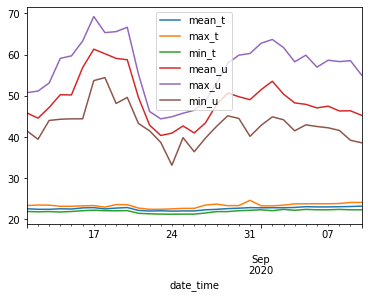

In [14]:
_ = concat_result.plot()

**Some 'magic' creating a json from dataframe**

In [15]:
concat_result.to_json()

'{"mean_t":{"1597104000000":22.5935190476,"1597190400000":22.4686314894,"1597276800000":22.4567678723,"1597363200000":22.5857955319,"1597449600000":22.5332319149,"1597536000000":22.8023714894,"1597622400000":22.8710419149,"1597708800000":22.5541014894,"1597795200000":22.7562272792,"1597881600000":22.8884099286,"1597968000000":22.1955951064,"1598054400000":22.0441391489,"1598140800000":22.101301,"1598227200000":22.0198057447,"1598313600000":22.0623242553,"1598400000000":22.0614946619,"1598486400000":22.3329359574,"1598572800000":22.4529967972,"1598659200000":22.6271017021,"1598745600000":22.7331215385,"1598832000000":22.8719944681,"1598918400000":22.8301687234,"1599004800000":22.8400668327,"1599091200000":22.8463621277,"1599177600000":22.9087209253,"1599264000000":23.0990485106,"1599350400000":23.0398170213,"1599436800000":23.0456189362,"1599523200000":23.0915667616,"1599609600000":23.1351589362,"1599696000000":23.2266485321},"max_t":{"1597104000000":23.36992,"1597190400000":23.49202,"1

# Time comparing a traditional loop and pandas transformation

In [16]:
# transform datetime column
ini = datetime.now()
teste = pd.to_datetime(df['date_time'])
print(f'{datetime.now() - ini}')
teste2 = pd.to_datetime(df['date_time'])
print(f'{datetime.now() - ini}')

0:00:00.012564
0:00:00.023186


In [17]:
results = json.loads(response.text)
ini = datetime.now()
for result in results:
    result['date_time'] = datetime.strptime('2019-01-04T16:41:24+0200', "%Y-%m-%dT%H:%M:%S%z")
print(f'{datetime.now() - ini}')
for result in results:
    result['date_time'] = datetime.strptime('2019-01-04T16:41:24+0200', "%Y-%m-%dT%H:%M:%S%z")    
print(f'{datetime.now() - ini}')

0:00:00.207236
0:00:00.422735


# Plotting some results using group_by from dataframe and matplotlib

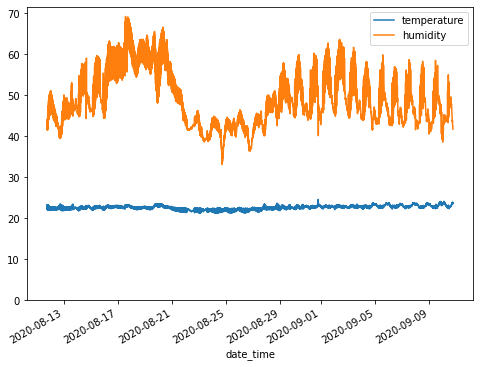

In [18]:
df['date_time'] = pd.to_datetime(df['date_time'])
fig, ax = plt.subplots(figsize=(8,6))

# group by data_id 
# data_id 128 is temperature 
# data_id 129 is humidity
_ = df.groupby('data_id').plot(
    kind='line', 
    x = "date_time", 
    y = "value", 
    ax=ax)
ax.legend(['temperature', 'humidity'])
ax.set_ylim(ymin=0)
plt.show()

# Create csv files querying PostgreSQL using dataframe methods

In [ ]:
!pip install psycopg2

sample_data


In [ ]:
import pandas as pd
from getpass import getpass
import psycopg2
import os

conn_cred = {
    'host': getpass(prompt='host: ', stream=None),
    'port': getpass(prompt='port: ', stream=None),
    'dbname': getpass(prompt='dbname: ', stream=None),
    'user': getpass(prompt='user: ', stream=None),
    'password': getpass(prompt='password: ', stream=None)
}

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


host: ··········
port: ··········
dbname: ··········
user: ··········
password: ··········


In [ ]:

conn = psycopg2.connect(**conn_cred)


def create_csvfile_from_query(
    connection, query, output_file): 
    """function to create csv file using query results:

    Args:
        connection (): connection to database.
        query (str): string containing query.
        output_file (str): output filename.
    Returns:
        Nothing
    """
    # limit the chuncksize to avoid Memory Error
    reader       = pd.read_sql(query, connection, chunksize=50000)

    #read chuncks until the end
    for chunk in reader:
        temp_regs = chunk
        # append or create file
        if os.path.isfile(output_file):
            temp_regs.to_csv(output_file,encoding='utf-8', mode='a', header=False)
        else:
            temp_regs.to_csv(output_file,encoding='utf-8')


           


In [ ]:
query = """
  SELECT * 
  FROM table1
  WHERE {}"""


for instance_id in [1,4,5]:
    last_id = 0
    total_regs = 0
    while True:
        # 
        filter = f"instance_id = {instance_id} AND id > {last_id}"
        output_file = f'output{instance_id}.csv'
        temp_regs   = pd.read_sql(query.format(filter), conn)

        # if it is over, it stops the process
        if len(temp_regs.index) == 0:
            print(f'{total_regs} for instance {instance_id}')
            break
        total_regs += len(temp_regs.index)

        # append or create file
        if os.path.isfile(output_file):
            temp_regs.to_csv(output_file,encoding='utf-8', mode='a', header=False)
        else:
            temp_regs.to_csv(output_file,encoding='utf-8')

        last_id = temp_regs['id'][0]      
    
